In [433]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pymongo
import json
import requests
from bs4 import BeautifulSoup

In [434]:
MONGO_CLIENT = pymongo.MongoClient("mongodb://localhost:27017/")
SDA_DB = MONGO_CLIENT["steam_dota_api"]
MLRS_COL = SDA_DB["multi_real_time_stats"]

In [435]:
# heros_by_names = {}
# heroid_winrate = {}
# headers = {
#     'User-Agent': 'Mozilla/5.0 (X11; Linux i686) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135 Safari/537.36'}
# page_link = 'https://www.dotabuff.com/heroes/winning'

# f = open('heroes.json')
# data = json.load(f)

# for hero in data:
#     heros_by_names[hero['localized_name']] = hero['id']

# page_response = requests.get(page_link, timeout=5, headers=headers)
# soup = BeautifulSoup(page_response.content, "html.parser")
# trs = soup.find_all('tr')
# for tr in trs[1:]:
#     hero_name, winrate = tr.find_all('td')[1:3]
#     heroid_winrate[heros_by_names.get(hero_name.a.string)] = winrate['data-value']

In [436]:
matches_for_pd = []

In [437]:
steam_dota_api_db = MONGO_CLIENT["steam_dota_api"]
stats_with_win_col = steam_dota_api_db["stats_with_win"]

for entry in stats_with_win_col.find({"$and": [
                         {"match.game_time": {"$gte": 600}},
                         {"match.game_time": {"$lte": 1200}}]}):
    tmp = {}

    tmp["timestamp"] = entry["match"]["timestamp"]
    tmp["game_time"] = entry["match"]["game_time"]

    tmp['score'] = entry["teams"][0]["score"] - entry["teams"][1]["score"]
    tmp['net_worth'] = entry["teams"][0]["net_worth"] - entry["teams"][1]["net_worth"]

    for team in entry["teams"]:
        for p_idx, player in enumerate(team["players"]):
            # tmp["team_{}_player_{}_winrate".format(team["team_number"], p_idx)] = float(heroid_winrate[player['heroid']]) - 50
            # tmp["team_{}_player_{}_heroid".format(team["team_number"], p_idx)] = player['heroid']
            tmp["team_{}_player_{}_level".format(team["team_number"], p_idx)] = player['level']
            tmp["team_{}_player_{}_kill_count".format(team["team_number"], p_idx)] = player['kill_count']
            tmp["team_{}_player_{}_death_count".format(team["team_number"], p_idx)] = player['death_count']
            tmp["team_{}_player_{}_assists_count".format(team["team_number"], p_idx)] = player['assists_count']
            # tmp["team_{}_player_{}_denies_count".format(team["team_number"], p_idx)] = player['denies_count']
            tmp["team_{}_player_{}_lh_count".format(team["team_number"], p_idx)] = player['lh_count']
            tmp["team_{}_player_{}_gold".format(team["team_number"], p_idx)] = player['gold']
            tmp["team_{}_player_{}_net_worth".format(team["team_number"], p_idx)] = player['net_worth']

            for i_idx, item in enumerate(player['items']):
                tmp["team_{}_player_{}_item_{}".format(team["team_number"], p_idx, i_idx)] = item

    for gg_idx, graph_gold in enumerate(entry['graph_data']['graph_gold']):
        tmp['graph_gold_{}'.format(gg_idx)] = graph_gold


    # tmp["building"] = entry["buildings"][0]["destroyed"]

    tmp["winner"] = entry["winner"]

    matches_for_pd.append(tmp)

In [438]:
matches = MLRS_COL.find({"match.winner": {"$exists": True}, 
                         "$and": [
                         {"match.game_time": {"$gte": 600}},
                         {"match.game_time": {"$lte": 1200}}]})

In [439]:
unique_ids = []

for entry in matches:
    try:
        if entry['match']['match_id'] in unique_ids:
            continue

        unique_ids.append(entry['match']['match_id'])
        tmp = {}

        tmp["timestamp"] = entry["match"]["timestamp"]
        tmp["game_time"] = entry["match"]["game_time"]

        tmp['score'] = entry["teams"][0]["score"] - entry["teams"][1]["score"]
        tmp['net_worth'] = entry["teams"][0]["net_worth"] - entry["teams"][1]["net_worth"]

        for team in entry["teams"]:
            for p_idx, player in enumerate(team["players"]):
                # tmp["team_{}_player_{}_winrate".format(team["team_number"], p_idx)] = float(heroid_winrate[player['heroid']]) - 50
                # tmp["team_{}_player_{}_heroid".format(team["team_number"], p_idx)] = player['heroid']
                tmp["team_{}_player_{}_level".format(team["team_number"], p_idx)] = player['level']
                tmp["team_{}_player_{}_kill_count".format(team["team_number"], p_idx)] = player['kill_count']
                tmp["team_{}_player_{}_death_count".format(team["team_number"], p_idx)] = player['death_count']
                tmp["team_{}_player_{}_assists_count".format(team["team_number"], p_idx)] = player['assists_count']
                # tmp["team_{}_player_{}_denies_count".format(team["team_number"], p_idx)] = player['denies_count']
                tmp["team_{}_player_{}_lh_count".format(team["team_number"], p_idx)] = player['lh_count']
                tmp["team_{}_player_{}_gold".format(team["team_number"], p_idx)] = player['gold']
                tmp["team_{}_player_{}_net_worth".format(team["team_number"], p_idx)] = player['net_worth']

                for i_idx, item in enumerate(player['items']):
                    tmp["team_{}_player_{}_item_{}".format(team["team_number"], p_idx, i_idx)] = item

        for gg_idx, graph_gold in enumerate(entry['graph_data']['graph_gold']):
            tmp['graph_gold_{}'.format(gg_idx)] = graph_gold


        # tmp["building"] = entry["buildings"][0]["destroyed"]

        tmp["winner"] = entry["match"]["winner"]

        matches_for_pd.append(tmp)
    except Exception as e:
        print(e, entry['match']['match_id'])

'items' 7539763194
'items' 7539769586


'items' 7540344483
'items' 7539940347
'items' 7539947961
'items' 7541460439
'items' 7541497612
'items' 7545694391
'items' 7545699932
'items' 7545712288
'items' 7545759506
'items' 7545773946
'items' 7545871185
'items' 7545864833
'items' 7545896481
'items' 7545974086
'items' 7546128945
'items' 7546156007
'items' 7547417213
'items' 7547460156
'items' 7547470738
'items' 7547483885
'items' 7548991466
'items' 7549499571
'items' 7550585270
'items' 7550625599
'items' 7550704109
'items' 7550720961
'items' 7551830846
'items' 7551873444
'items' 7553892089
'items' 7553898333
'items' 7554987075


In [440]:
df = pd.DataFrame(matches_for_pd)

In [441]:
df.shape

(2274, 293)

In [442]:
df

,timestamp,game_time,score,net_worth,team_2_player_0_level,team_2_player_0_kill_count,team_2_player_0_death_count,team_2_player_0_assists_count,team_2_player_0_lh_count,team_2_player_0_gold,...,graph_gold_119,graph_gold_120,graph_gold_121,graph_gold_122,graph_gold_123,graph_gold_124,graph_gold_125,graph_gold_126,graph_gold_127,winner
0,1278,961,8,2294,13,6,1,5,142,2278,...,1349,1542,1350,1429,1608,1511,2065,2284,2294,radiant
1,1144,849,-1,1261,11,4,1,3,84,1103,...,1263,1296,1230,1080,1129,1101,1004,1320,1476,dire
2,1322,1030,4,2241,13,6,1,3,159,1015,...,2408,2183,1906,1975,2235,2802,3006,2730,2241,dire
3,1281,1044,-10,-6837,12,3,2,3,102,1091,...,-4380,-4888,-5234,-5467,-5285,-5100,-5089,-5150,-5192,dire
4,1178,897,21,13149,10,5,0,3,90,1752,...,11244,11193,11178,11331,11432,11640,12206,12680,12945,radiant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2269,1037,734,10,3869,10,5,2,11,73,418,...,4217,4261,4255,4025,3869,3926,4105,4402,4476,radiant
2270,958,620,-1,-3306,5,0,0,1,30,487,...,-2035,-2105,-2263,-2402,-2469,-2541,-2654,-2761,-2761,dire
2271,1220,932,14,8244,10,4,3,12,20,280,...,7638,7643,7602,7603,7560,7455,7419,7521,7621,radiant
2272,919,706,-4,-3800,9,2,0,1,81,276,...,-2788,-2942,-3076,-3165,-3356,-3657,-3775,-3799,-3804,radiant


In [443]:
df.to_csv('2274_unique_id__fixed_game_time.csv', index=False)

In [444]:
X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values

In [445]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(le.classes_) # 0=dire; 1=radiant

['dire' 'radiant']


In [446]:
y

array([1, 0, 0, ..., 1, 1, 1])

In [447]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [448]:
results = []

In [449]:
criterion = 'gini'

classifier = DecisionTreeClassifier(criterion=criterion, random_state=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred_proba = classifier.predict_proba(X_test)
print(y_pred_proba[:5])

acc = accuracy_score(y_test, y_pred)
print(acc)
results.append({
    'classifier': 'CART',
    'criterion': criterion,
    'accuracy_score': acc
    })

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
0.5877192982456141


In [450]:
criterion = 'entropy'

classifier = DecisionTreeClassifier(criterion=criterion, random_state=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred_proba = classifier.predict_proba(X_test)
print(y_pred_proba[:5])

acc = accuracy_score(y_test, y_pred)
print(acc)
results.append({
    'classifier': 'C4.5',
    'criterion': criterion,
    'accuracy_score': acc
    })

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
0.6096491228070176


In [451]:
# criterions = ['gini', 'entropy', 'log_loss']
# n_estimators_arr = [10, 20, 50, 100, 150]
etc_results = []

# for criterion in criterions:
#     for n_estimators in n_estimators_arr:
classifier = ExtraTreesClassifier(criterion='entropy', n_estimators=150, random_state=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred_proba = classifier.predict_proba(X_test)
print(y_pred_proba[:5])
etc_results.append({
    'criterion': 'entropy',
    'n_estimators': 150, 
    'accuracy_score': accuracy_score(y_test, y_pred)})

result = max(etc_results, key=lambda x: x['accuracy_score'])
print(result['accuracy_score'])
result['classifier'] = 'Extra Trees Classifier'
results.append(result)

[[0.58       0.42      ]
 [0.53333333 0.46666667]
 [0.24       0.76      ]
 [0.16666667 0.83333333]
 [0.48       0.52      ]]
0.6403508771929824


In [452]:
# {'loss': 'log_loss',
#   'learning_rate': 1,
#   'n_estimators': 50,
#   'criterion': 'friedman_mse',
#   'max_depth': 4,
#   'accuracy_score': 0.8166666666666667,
#   'classifier': 'Gradient Boosting'},


gb_results = []

classifier = GradientBoostingClassifier(loss='log_loss', n_estimators=50, learning_rate=1, criterion='friedman_mse', max_depth=4, random_state=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred_proba = classifier.predict_proba(X_test)
print(y_pred_proba[:5])
gb_results.append({
    'loss': 'log_loss',
    'learning_rate': 1,
    'n_estimators': 50,
    'criterion': 'friedman_mse',
    'max_depth': 4,
    'accuracy_score': accuracy_score(y_test, y_pred)
})

result = max(gb_results, key=lambda x: x['accuracy_score'])
print(result['accuracy_score'])
result['classifier'] = 'Gradient Boosting'
results.append(result)

[[0.52670424 0.47329576]
 [0.41045458 0.58954542]
 [0.02725968 0.97274032]
 [0.01907733 0.98092267]
 [0.57040994 0.42959006]]
0.618421052631579


In [453]:
# {'learning_rate': 0.2,
#   'max_iter': 100,
#   'accuracy_score': 0.6505376344086021,
#   'classifier': 'Hist Gradient Boosting'},

# learning_rate_arr = [0.1, 0.2, 0.5, 1]
# max_iter_arr = [10, 50, 100, 150]
hgb_results = []

# for learning_rate in learning_rate_arr:
#     for max_iter in max_iter_arr:
classifier = HistGradientBoostingClassifier(learning_rate=0.2, max_iter=100, random_state=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred_proba = classifier.predict_proba(X_test)
print(y_pred_proba[:5])
hgb_results.append({
    'learning_rate': 0.2,
    'max_iter': 100,
    'accuracy_score': accuracy_score(y_test, y_pred)
})

result = max(hgb_results, key=lambda x: x['accuracy_score'])
print(result['accuracy_score'])
result['classifier'] = 'Hist Gradient Boosting'
results.append(result)

[[0.6296798  0.3703202 ]
 [0.16048975 0.83951025]
 [0.17854312 0.82145688]
 [0.00887919 0.99112081]
 [0.07539148 0.92460852]]
0.6359649122807017


In [454]:
#  {'n_estimators': 50,
#   'criterion': 'gini',
#   'accuracy_score': 0.6881720430107527,
#   'classifier': 'Random Forest'},

# n_estimators_arr = [10, 20, 50, 100, 150]
# criterion_arr = ['gini', 'entropy']
rf_results = []

# for n_estimators in 50:
#     for criterion in criterion_arr:
rf_classifier = RandomForestClassifier(n_estimators=50, criterion='gini', random_state=1)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
y_pred_proba = rf_classifier.predict_proba(X_test)
print(y_pred_proba[:5])
rf_results.append({
    'n_estimators': 50,
    'criterion': 'gini',
    'accuracy_score': accuracy_score(y_test, y_pred)
})

result = max(rf_results, key=lambda x: x['accuracy_score'])
print(result['accuracy_score'])
result['classifier'] = 'Random Forest'
results.append(result)

[[0.6  0.4 ]
 [0.44 0.56]
 [0.38 0.62]
 [0.16 0.84]
 [0.46 0.54]]
0.6973684210526315


In [455]:
#  {'n_estimators': 50,
#   'learning_rate': 0.1,
#   'algorithm': 'SAMME.R',
#   'accuracy_score': 0.7150537634408602,
#   'classifier': 'Adaboost'}]

# n_estimators_arr = [10, 20, 50, 100, 150]
# learning_rate_arr = [0.1, 0.2, 0.5, 1]
# algorithm_arr = ['SAMME', 'SAMME.R']
ada_results = []

# for n_estimators in n_estimators_arr:
#     for learning_rate in learning_rate_arr:
#         for algorithm in algorithm_arr:
classifier = AdaBoostClassifier(n_estimators=50, learning_rate=0.1, algorithm='SAMME.R', random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred_proba = classifier.predict_proba(X_test)
print(y_pred_proba[:5])
ada_results.append({
    'n_estimators': 50,
    'learning_rate': 0.1,
    'algorithm': 'SAMME.R',
    'accuracy_score': accuracy_score(y_test, y_pred)
})

result = max(ada_results, key=lambda x: x['accuracy_score'])
print(result['accuracy_score'])
result['classifier'] = 'Adaboost'
results.append(result)

[[0.50676449 0.49323551]
 [0.51416298 0.48583702]
 [0.46860871 0.53139129]
 [0.43147741 0.56852259]
 [0.50323563 0.49676437]]
0.6535087719298246


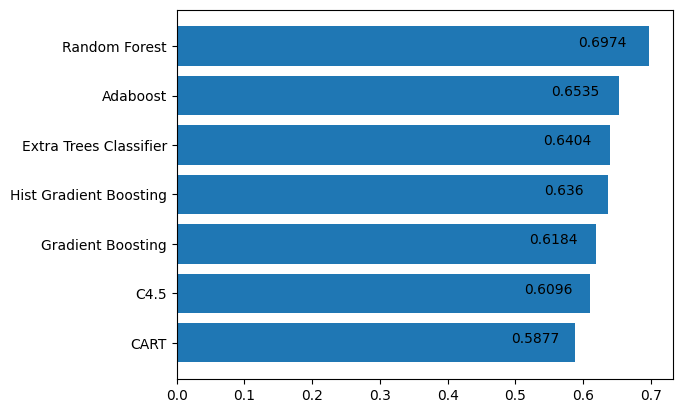

In [456]:
plt.rcdefaults()
fig, ax = plt.subplots()

df = pd.DataFrame(results)

df_sorted = df.sort_values('accuracy_score')

ax.barh('classifier', 'accuracy_score', data=df_sorted)
for i in range(len(results)):
    ax.text(results[i]['accuracy_score'] * 0.9, results[i]['classifier'], round(results[i]['accuracy_score'], 4), ha='center', color='black')


In [479]:
matches = MLRS_COL.find({"match.winner": {"$exists": False}, 
                         "$and": [
                         {"match.game_time": {"$gte": 2000}},
                         {"match.game_time": {"$lte": 5000}}]})

matches_for_pd = []

In [480]:
unique_ids = []

for entry in matches:
    try:
        if entry['match']['match_id'] in unique_ids:
            continue

        unique_ids.append(entry['match']['match_id'])
        tmp = {}

        tmp["timestamp"] = entry["match"]["timestamp"]
        tmp["game_time"] = entry["match"]["game_time"]

        tmp['score'] = entry["teams"][0]["score"] - entry["teams"][1]["score"]
        tmp['net_worth'] = entry["teams"][0]["net_worth"] - entry["teams"][1]["net_worth"]

        for team in entry["teams"]:
            for p_idx, player in enumerate(team["players"]):
                # tmp["team_{}_player_{}_winrate".format(team["team_number"], p_idx)] = float(heroid_winrate[player['heroid']]) - 50
                # tmp["team_{}_player_{}_heroid".format(team["team_number"], p_idx)] = player['heroid']
                tmp["team_{}_player_{}_level".format(team["team_number"], p_idx)] = player['level']
                tmp["team_{}_player_{}_kill_count".format(team["team_number"], p_idx)] = player['kill_count']
                tmp["team_{}_player_{}_death_count".format(team["team_number"], p_idx)] = player['death_count']
                tmp["team_{}_player_{}_assists_count".format(team["team_number"], p_idx)] = player['assists_count']
                # tmp["team_{}_player_{}_denies_count".format(team["team_number"], p_idx)] = player['denies_count']
                tmp["team_{}_player_{}_lh_count".format(team["team_number"], p_idx)] = player['lh_count']
                tmp["team_{}_player_{}_gold".format(team["team_number"], p_idx)] = player['gold']
                tmp["team_{}_player_{}_net_worth".format(team["team_number"], p_idx)] = player['net_worth']

                for i_idx, item in enumerate(player['items']):
                    tmp["team_{}_player_{}_item_{}".format(team["team_number"], p_idx, i_idx)] = item

        for gg_idx, graph_gold in enumerate(entry['graph_data']['graph_gold']):
            tmp['graph_gold_{}'.format(gg_idx)] = graph_gold


        # tmp["building"] = entry["buildings"][0]["destroyed"]

        # tmp["winner"] = entry["match"]["winner"]

        matches_for_pd.append(tmp)
    except Exception as e:
        print(e, entry['match']['match_id'])

In [487]:
df = pd.DataFrame(matches_for_pd)
df.head()

,timestamp,game_time,score,net_worth,team_2_player_0_level,team_2_player_0_kill_count,team_2_player_0_death_count,team_2_player_0_assists_count,team_2_player_0_lh_count,team_2_player_0_gold,...,graph_gold_118,graph_gold_119,graph_gold_120,graph_gold_121,graph_gold_122,graph_gold_123,graph_gold_124,graph_gold_125,graph_gold_126,graph_gold_127
0,2413,2051,2,-7482,22,11,4,1,303,537,...,-3480,-3899,-4242,-4015,-3079,-3654,-3304,-2895,-3458,-4525
1,3122,2225,-3,1803,20,3,6,12,213,4786,...,-3604,-4045,-4971,-421,242,642,1600,3225,2925,1937
2,2992,2075,-4,-18639,14,4,4,6,109,1385,...,-13721,-14537,-15684,-18328,-18429,-18374,-18485,-17839,-18488,-18690
3,2382,2042,-2,-6268,17,3,4,11,138,1003,...,317,1109,1138,766,-2586,-5748,-6027,-6859,-7060,-6950
4,2362,2023,-8,-5650,17,1,5,14,82,1041,...,-6808,-7419,-6358,-6930,-6216,-5689,-5274,-5416,-5993,-5711


In [482]:
X = df.iloc[:, :].values

In [483]:
print(X[:, 0])

[2413 3122 2992 2382 2362 2315 2341 2315 2284 2306 2302 2301 2396 2356
 2319 3143 2361 2350 2917 2533 2446 2934 3922 2420 2337 2316 2333 3084
 2455 2476 2399 2470 2927 2341 2929 2409 2285]


In [484]:
classifier.predict_proba(X)

array([[0.56452851, 0.43547149],
       [0.4996206 , 0.5003794 ],
       [0.64715855, 0.35284145],
       [0.56194343, 0.43805657],
       [0.58881375, 0.41118625],
       [0.54394645, 0.45605355],
       [0.36785847, 0.63214153],
       [0.64710576, 0.35289424],
       [0.6371113 , 0.3628887 ],
       [0.36944871, 0.63055129],
       [0.64710576, 0.35289424],
       [0.36785847, 0.63214153],
       [0.5059358 , 0.4940642 ],
       [0.59622384, 0.40377616],
       [0.44250215, 0.55749785],
       [0.36950257, 0.63049743],
       [0.36944871, 0.63055129],
       [0.36785847, 0.63214153],
       [0.43522825, 0.56477175],
       [0.36321287, 0.63678713],
       [0.55880029, 0.44119971],
       [0.40854967, 0.59145033],
       [0.66038994, 0.33961006],
       [0.50896044, 0.49103956],
       [0.63933679, 0.36066321],
       [0.36950257, 0.63049743],
       [0.45950644, 0.54049356],
       [0.66038994, 0.33961006],
       [0.44506196, 0.55493804],
       [0.64554393, 0.35445607],
       [0.